In [1]:
import os
import shutil
import pandas as pd
from torchvision.io import read_image, ImageReadMode
import torch
from tqdm import tqdm
from PIL import Image
from PIL.Image import Resampling
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
import torchvision.transforms as T
import torchvision.transforms.functional as F
from torchvision.io import read_image, ImageReadMode
import random



In [2]:
# https://pytorch.org/vision/stable/auto_examples/plot_transforms.html#sphx-glr-auto-examples-plot-transforms-py

def plot(imgs, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0])
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            if isinstance(img, torch.Tensor):
                img = F.to_pil_image(img)
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [3]:
#data_path = '\\dataset\\devide'
data_path = r"C:\Users\梦在灯火阑珊\Desktop\studay\9517\group\dataset\devide"
output_path = '\\dataset\\preprocessing'
#class_names_path = 'classnames.txt'
desired_size = 224

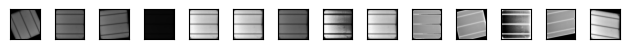

In [5]:
img = read_image(data_path + '\\train\\0.0_mono\\cell0004.png', mode=ImageReadMode.RGB)

img1 = T.RandomRotation(degrees=(0, 180))(img)

img2 = F.solarize(img, threshold=200)

policies = [T.AutoAugmentPolicy.CIFAR10, T.AutoAugmentPolicy.IMAGENET, T.AutoAugmentPolicy.SVHN]
augmenters = [T.AutoAugment(policy) for policy in policies]

imgs_autoaug = [
    [augmenter(img) for _ in range(4)]
    for augmenter in augmenters
]

# Flatten the list of lists
imgs_autoaug_flat = [img for sublist in imgs_autoaug for img in sublist]

all_imgs = [img1, img2] + imgs_autoaug_flat

plot(all_imgs)




In [18]:
# desired_size = 300
# data_path = r"C:\Users\梦在灯火阑珊\Desktop\studay\9517\group\dataset\devide\train"

# def augment_image(img_path):
#     img = read_image(img_path, mode=ImageReadMode.GRAY)
#     _, h, w = img.size()
#     ratio = h / w
#     size = (int(desired_size * ratio), desired_size) if ratio > 1 else (desired_size, int(desired_size / ratio))

#     img1 = T.RandomRotation(degrees=(0, 180))(img)
#     img2 = F.solarize(img, threshold=200)
    
#     policies = [T.AutoAugmentPolicy.CIFAR10, T.AutoAugmentPolicy.IMAGENET, T.AutoAugmentPolicy.SVHN]
#     augmenters = [T.AutoAugment(policy) for policy in policies]

#     imgs_autoaug = [
#         [augmenter(img) for _ in range(4)]
#         for augmenter in augmenters
#     ]

#     # Flatten the list of lists
#     imgs_autoaug_flat = [img for sublist in imgs_autoaug for img in sublist]
      
#     selected_imgs = random.sample(imgs_autoaug_flat, 4)
#     img3, img4, img5, img6 = selected_imgs

#     imgs = [img1, img2, img3, img4, img5, img6]
#     return imgs


# for label in os.listdir(data_path):
#     label_dir = os.path.join(data_path, label)

#     for img_name in os.listdir(label_dir):
#         img_path = os.path.join(label_dir, img_name)
#         augmented_images = augment_image(img_path)

#         for i, augmented_img in enumerate(augmented_images):
#             augmented_img_name = f"{img_name.split('.')[0]}_aug_{i+1}.png"
#             augmented_img_path = os.path.join(label_dir, augmented_img_name)
            
#             # Convert the tensor to a PIL Image and save it
#             if augmented_img.dim() == 3:
#                 augmented_img_np = augmented_img.permute(1, 2, 0).squeeze().numpy()
#             else:
#                 augmented_img_np = augmented_img.squeeze().numpy()
                
#             augmented_img_np = (augmented_img_np * 255).astype('uint8')
#             Image.fromarray(augmented_img_np).save(augmented_img_path)



In [6]:
desired_size = 300
data_path = r"C:\Users\梦在灯火阑珊\Desktop\studay\9517\group\dataset\devide\train"

def augment_image(img_path, policy):
    img = read_image(img_path, mode=ImageReadMode.GRAY)
    _, h, w = img.size()
    ratio = h / w
    size = (int(desired_size * ratio), desired_size) if ratio > 1 else (desired_size, int(desired_size / ratio))

    img1 = T.RandomRotation(degrees=(0, 180))(img)
    img2 = F.solarize(img, threshold=200)
    
    augmenter = T.AutoAugment(policy)

    imgs_autoaug = [augmenter(img) for _ in range(4)]
      
    selected_imgs = random.sample(imgs_autoaug, 4)
    img3, img4, img5, img6 = selected_imgs

    imgs = [img1, img2, img3, img4, img5, img6]
    return imgs

for label in os.listdir(data_path):
    label_dir = os.path.join(data_path, label)
    
    while len(os.listdir(label_dir)) <= 500:
        for policy in T.AutoAugmentPolicy:
            for img_name in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_name)
                augmented_images = augment_image(img_path, policy)

                for i, augmented_img in enumerate(augmented_images):
                    augmented_img_name = f"{img_name.split('.')[0]}_aug_{i+1}_{policy.name}.png"
                    augmented_img_path = os.path.join(label_dir, augmented_img_name)
                    
                    # Convert the tensor to a PIL Image and save it
                    if augmented_img.dim() == 3:
                        augmented_img_np = augmented_img.permute(1, 2, 0).squeeze().numpy()
                    else:
                        augmented_img_np = augmented_img.squeeze().numpy()
                        
                    augmented_img_np = (augmented_img_np * 255).astype('uint8')
                    Image.fromarray(augmented_img_np).save(augmented_img_path)
                
                # 检查是否超过500张，如果是，则跳出内部循环
                if len(os.listdir(label_dir)) > 500:
                    break
            # 检查是否超过500张，如果是，则跳出外部循环
            if len(os.listdir(label_dir)) > 500:
                break
